<a href="https://colab.research.google.com/github/Seenuprime/Deep-Learning/blob/main/Regression_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('Boston (1).csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# df.sort_values(by=['MEDV'], ascending=True, inplace=True)
# df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
398,38.35180,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59,5.0
405,67.92080,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98,5.0
400,25.04610,0.0,18.1,0,0.693,5.987,100.0,1.5888,24,666.0,20.2,396.90,26.77,5.6
399,9.91655,0.0,18.1,0,0.693,5.852,77.8,1.5004,24,666.0,20.2,338.16,29.97,6.3
414,45.74610,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,7.0


### Dividing the Dataset into Training set and Test set

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling the Dataset

In [ ]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# ct = make_column_transformer(
#     (MinMaxScaler(), slice(0, 13))
# )

In [ ]:
# X_train = ct.fit_transform(X_train)
# X_test = ct.transform(X_test)

## Building a Model

In [ ]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
13/13 [==============================] - 2s 3ms/step - loss: 32.7595 - mae: 32.7595
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 18.6191 - mae: 18.6191
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 10.0802 - mae: 10.0802
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 6.3348 - mae: 6.3348
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 5.6638 - mae: 5.6638
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 5.5446 - mae: 5.5446
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 5.4125 - mae: 5.4125
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 5.3357 - mae: 5.3357
Epoch 9/100
13/13 [==============================] - 0s 2ms/step - loss: 5.2958 - mae: 5.2958
Epoch 10/100
13/13 [==============================] - 0s 2ms/step - loss: 5.2768 - mae: 5.2768
Epoch 11/100
13/13 [==============================] -

## Evaluating the Model

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 4.8008 - mae: 4.8008


[4.800771236419678, 4.800771236419678]

In [ ]:
predicted = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
np.column_stack((y_test, tf.squeeze(predicted)))

array([[23.3       , 21.77352142],
       [24.8       , 23.92103767],
       [20.1       , 25.92017174],
       [28.1       , 22.83834457],
       [14.1       , 13.43975067],
       [ 8.4       , 12.17816925],
       [48.3       , 21.88467789],
       [23.8       , 23.53377342],
       [22.9       , 23.52183723],
       [15.4       , 16.065588  ],
       [29.6       , 24.49720573],
       [28.7       , 22.57782936],
       [33.1       , 24.11694527],
       [26.4       , 23.14565849],
       [18.6       , 26.27970123],
       [22.6       , 22.67261887],
       [43.5       , 24.02080917],
       [19.6       , 15.55955029],
       [19.1       , 18.89775276],
       [11.7       , 13.94048786],
       [23.1       , 14.46815491],
       [18.9       , 22.94183922],
       [15.6       , 11.8205471 ],
       [22.        , 23.55247498],
       [12.3       , 16.67650223],
       [24.7       , 24.24493408],
       [ 9.5       , 12.67444992],
       [18.3       , 20.67827415],
       [15.1       ,

Text(0.5, 0, 'epochs')

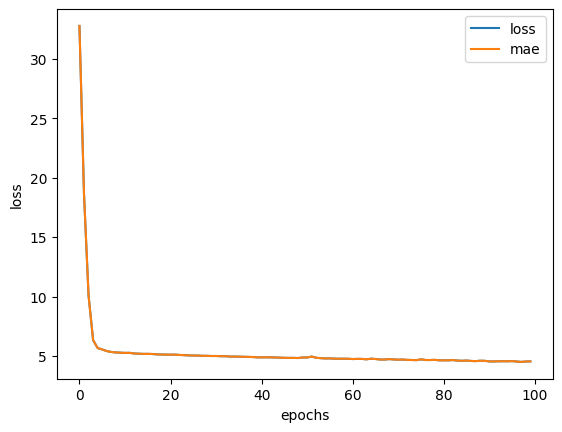

In [ ]:
## Ploting the Learning curve

pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')